In [20]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from metpy.plots import wx_code_to_numeric





#import numpy as np

import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import current_weather, sky_cover, StationPlot, simple_layout
from metpy.io import metar

#import pandas as pd

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [21]:
data = Dataset("20040618_2300")

In [35]:
#for var in data.variables:
    #print(var)

station = data.variables["stationName"][:]
lat = data.variables["latitude"][:]
lon = data.variables["longitude"][:]
temp = data.variables["temperature"][:]
dew = data.variables["dewpoint"][:]
speed = data.variables["windSpeed"][:]
direction = data.variables["windDir"][:]
gust = data.variables["windGust"][:]
weather = data.variables["presWeather"][:]
vis = data.variables["visibility"][:]
slp = data.variables["seaLevelPress"][:]
sky = data.variables["skyCover"][:]



In [85]:
stationName = [None] * len(station)
currentWeather = [None] * len(weather)
skyCover = [None] * len(sky)

for index in range(len(stationName)):
    stn = station[index].tobytes().decode().rstrip("\x00")
    stationName[index] = stn

for index in range(len(weather)):
    wx = weather[index].tobytes().decode().rstrip("\x00")
    currentWeather[index] = wx.strip()

currentWeather = wx_code_to_numeric(currentWeather)

for index in range(len(sky)):
    sk = sky[index].tobytes().decode().replace('\x00','')
    skyCover[index] = (sk.replace(' ',''))[-3:]
    print(skyCover[index])


                      

OVC
SCT

SKC
OVC
BKN
BKN
CLR
OVC
OVC
OVC
OVC
FEW
OVC

OVC

OVC
OVC
BKN
CLR
SCT
SCT
SCT
CLR
OVC
OVC
OVC
SCT
CLR
CLR
CLR
BKN
SCT
BKN
SCT
BKN
FEW
CLR
SCT
BKN
SCT
OVC
BKN
BKN
SCT
CLR
OVC

OVC


BKN
OVC
FEW
SCT
BKN
OVC

FEW
SCT
OVC
BKN
FEW
SCT
CLR
CLR
CLR
BKN
BKN
SCT
BKN
CLR
CLR
OVC
BKN
CLR
OVC
FEW
OVC
CLR
OVC
CLR
BKN
BKN
CLR
CLR
FEW
CLR
OVC
BKN
BKN
SKC
SKC

SKC
SCT

SKC
SKC
CLR
OVC
SCT
CLR
BKN
OVC
SCT
FEW
FEW

FEW
OVC
BKN
BKN
OVC
OVC


BKN
CLR
FEW
FEW
SKC
OVC

SKC
SKC
BKN
OVC
BKN
OVC
OVC
SCT
FEW

BKN
OVC
BKN
OVC
OVC
OVC
CLR
FEW
OVC
BKN
FEW
OVC
CLR
OVC
CLR
BKN
CLR
OVC
CLR
CLR
OVC
CLR
FEW
OVC
CLR
CLR
CLR
SCT
CLR
OVC
CLR
BKN
OVC
BKN
FEW
OVC
BKN
OVC
CLR

OVC
CLR
FEW
OVC
CLR
CLR
CLR
CLR
OVC
CLR
CLR
CLR
CLR
OVC
CLR
SCT
CLR
FEW
CLR
CLR
CLR
SCT
CLR
FEW
CLR
CLR
CLR
BKN
OVC
CLR
CLR
BKN
CLR
CLR
OVC
CLR
CLR
OVC
SCT
CLR
FEW
OVC
BKN
CLR
CLR
CLR
CLR
CLR
CLR
CLR
CLR
CLR
CLR
CLR
OVC
CLR
BKN
CLR
FEW
CLR
CLR
CLR
CLR
OVC
SCT
SCT
FEW
BKN
SCT

SCT
CLR
CLR




CLR
FEW
FEW
OVC
SCT
OVC
SCT
OVC


BKN
OVC
SKC
BKN
BK

In [28]:
dataForDf = {"station_id":stationName,
           "lattitude":lat,
           "longitude":lon,
           "wind_direction":direction,
           "wind_speed":speed,
           "wind_gust":gust,
           "visibility":vis,
           "current_wx1_symbol":currentWeather,
           "air_temperature":temp,
           "dew_point_temperature":dew,
           "air_pressure_at_sea_level":slp}
#colName = 

df = pd.DataFrame(data=dataForDf, index=stationName, columns=None, dtype=None)

#print(df)

df.dropna(how="any", subset=["wind_direction","wind_speed"])

station_id  lattitude   longitude  wind_direction  wind_speed  wind_gust  \
KCZK       KCZK  45.669998 -121.879997            90.0    5.144444        NaN   
CYUS       CYUS  68.820000  -93.430000           260.0    1.028889        NaN   
PAWR       PAWR  60.770000 -148.679993             0.0    0.000000        NaN   
KBOS       KBOS  42.369999  -71.019997            90.0    3.601111        NaN   
KDTN       KDTN  32.529999  -93.750000           200.0    5.658889        NaN   
...         ...        ...         ...             ...         ...        ...   
CWZL       CWZL  53.029999 -131.600006           360.0    8.745556        NaN   
PASP       PASP  61.820000 -147.500000             0.0    0.000000        NaN   
CWJU       CWJU  54.250000 -132.949997            90.0    6.687778        NaN   
CWDJ       CWDJ  50.400002 -104.580002           340.0    1.543333        NaN   
MYGF       MYGF  26.549999  -78.699997           130.0    3.086667        NaN   

        visibility  current_wx1_symbol  air_temperature  \
KCZK  16093.500000                   0       303.149994   
CYUS    201.168747                   0       273.149994   
PAWR  32187.000000                   0       289.149994   
KBOS   3218.699951                  10       290.149994   
KDTN   3218.699951                  17       301.149994   
...            ...                 ...              ...   
CWZL           NaN                   0       291.149994   
PASP  32187.000000                   0       297.149994   
CWJU           NaN                   0       296.149994   
CWDJ           NaN                   0       289.149994   
MYGF   9999.017578                   0       303.149994   

      dew_point_temperature  air_pressure_at_sea_level  
KCZK             283.149994                   101370.0  
CYUS                    NaN                        NaN  
PAWR             286.149994                   102910.0  
KBOS             289.149994                        NaN  
KDTN             296.149994                        NaN  
...                     ...                        ...  
CWZL             284.149994                   102220.0  
PASP             286.149994                        NaN  
CWJU             282.149994                   102080.0  
CWDJ             276.149994                        NaN  
MYGF             297.149994                        NaN  

[3152 rows x 11 columns]

In [30]:
#first convert the lat/lon to map projection coordinates
locs = proj.transform_points(ccrs.PlateCarree(),df['longitude'].values,df['lattitude'].values)

#now thin the data
dataThin = df[mpcalc.reduce_point_density(locs, 250000)]
#print(dataThin)

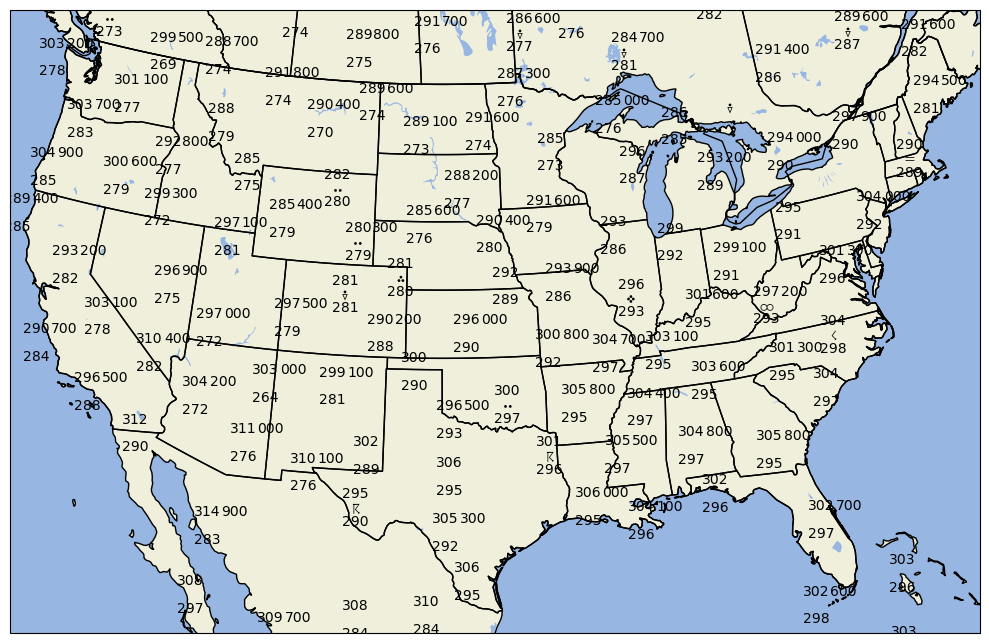

In [32]:
#map projection jusing a Lambert Conformal Projection
#we'll center the map at 100W,35N
proj = ccrs.LambertConformal(central_longitude=-100,central_latitude=35)

#create 10" x 10" figure with a dpi=100
fig = plt.figure(figsize=(10,10), dpi=100)

#add subplot with projection
ax = fig.add_subplot(1,1,1,projection=proj)

#add elements to make map more useable
ax.add_feature(cfeature.LAND, zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.LAKES, zorder=1)
ax.add_feature(cfeature.COASTLINE, zorder=2)
ax.add_feature(cfeature.STATES, zorder=3)
ax.add_feature(cfeature.BORDERS, zorder=3)


#zoom on the CONUS
#lon_min = -120
#lon_max = -75
#lat_min = 23
#lat_max = 50
ax.set_extent((-120, -75, 23, 50))

fig.tight_layout()

stationplots = StationPlot(ax, dataThin.longitude, dataThin.lattitude, transform=ccrs.PlateCarree(), clip_on=True)

simple_layout.plot(stationplots, dataThin)




fig.tight_layout()

#save the map as simple_surface_obs.png
plt.savefig("simple_surface_obs.png")